In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# read dataset
df=pd.read_csv("F:\\symb. ML\\data files\\bodyfat.csv")

In [3]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
# check null values
df.isna().sum()

Density    0
bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
# check correlation
df.corr()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
bodyfat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


<AxesSubplot:>

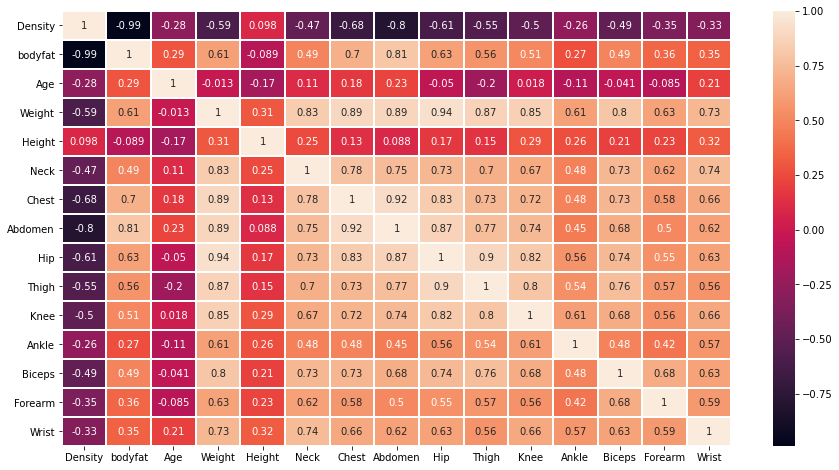

In [7]:
# plot correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth='1')

- Density is highly correlated with Bodyfat negatively.
- Abdomen, Weight, Hip is positively correlated with Bodyfat with high numbers.

#### Check behaviour of variables with target variable.

<Figure size 2160x576 with 0 Axes>

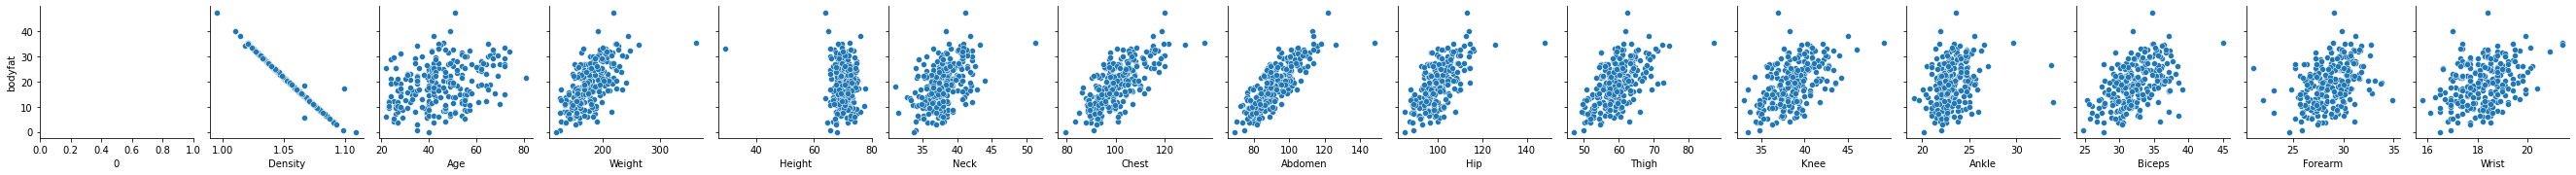

In [5]:
plt.figure(figsize=(30,8))
sns.pairplot(x_vars=['0','Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],y_vars=["bodyfat"],data=df)

In [8]:
# assign independent and dependent variables
x=df.drop(columns="bodyfat")
y=df["bodyfat"]

In [9]:
# split data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
# fit model
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [11]:
# Evaluation of model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Training data score is :",model.score(xtrain,ytrain))
print("Testing data score is :",model.score(xtest,ytest))
mae=mean_absolute_error(ytest,ypred)
print("Mean Absolute error is :",mae)
mse=mean_squared_error(ytest,ypred)
print("Mean Squared error is :",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

Training data score is : 0.9741773679932808
Testing data score is : 0.9920322045008588
Mean Absolute error is : 0.4329081176906287
Mean Squared error is : 0.5762546808927981
Root Mean Squared error is : 0.7591144056680772


In [12]:
#slope
model.coef_

array([-4.11024678e+02,  1.52381156e-02,  5.79140094e-03,  2.54264651e-03,
       -3.60408307e-02,  4.80507876e-02,  1.17008579e-02,  1.99096134e-02,
        1.26136693e-02, -4.72323642e-03, -9.21572529e-02, -8.31697291e-02,
        5.91102146e-02,  1.94368776e-02])

In [13]:
#y intercept
model.intercept_

446.7575334383474